# Project Three Notebook
By [Erica Dumore](https://www.linkedin.com/in/erica-dumore-62b306a2/) 


## Is this restaurant up to code?

This project takes generated data from [data.gov](data.gov) that evaluated different restaurants located throughout San Francisco, California and reported their health inspection spore. The city released this data publically, reporting the name of a restaurant, the date of the inspection, the reason for the inspection, the inspection score it received, a description if a violation was found, and the risk category the restaurant was placed in as a result. 

This project focuses on specific categories, inspection score and inspection type, found within [this csv file](restaurant.csv) which can be downloaded from this [link](https://catalog.data.gov/dataset/food-inspections-lives-standard), to predict whether our target, the inspection scores, can be predicted by our features, the different types of inspections being preformed. Through the use of a linear regression graph, we will see what correlation exists between our target and our features. Based on the pattern generated, we will be able to predict whether an inspection score does correlate with the type of inspection being preformed, allowing the investigator to have an idea prior to preforming the inspection, what they can expect to see. 

The idea being that a new ownership inspection may often result in a high inspection score with low risk, verse a foodborne illness investigation may result in a low inspection score with high risk. Or a scheduled, verse an unscheduled inspection, may influence the outcome of the inspection score and risk category. These were a few of my hypotheses at the outset of this project. 

## Process

This project took a lot of trial and error. The first step was deciding what my target and features were going to be. I knew I wanted the inspection scores to be my target, but deciding what would be my features was a more difficult task. Ultimately I decided to use the different types of inspections being performed. This was because I needed a feature that was going to be predictory, something that could be used repetitively based off of one factor. 

After I had decided my target and my feature I created my first set of code. The first time I created my code I mistakenly generated a cell for each individual linear graph for each different type of inspection performed. Although these graphs were accurate and did provide me with some feedback, they were too specific and did not provide me with an overall view of how all the different types of inspections correlated together in terms of what range they fell into for inspection scores. 

Below, under the heading Data Cleaning, please find an explanation of how I rewrote my code to solve the above mentioned problem, utilizing dummy variables to add all of the different types of inspections onto my data spreadsheet to generate number responses, making it even easier to graph. 

In [101]:
import os
try:
    inputFunc = raw_input
except NameError:
    inputFunc = input

import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
 
import seaborn as sns
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import random



# Custom functions

def evaluate(pred, labels_test):
    acc = accuracy_score(pred, labels_test)
    print ("Accuracey: %s"%acc)
    tn, fp, fn, tp = confusion_matrix(labels_test, pred).ravel()

    recall = tp / (tp + fp)
    percision = tp / (tp + fn)
    f1 = (2 / ((1/recall)+(1/percision)))

    print ("")
    print ("True Negatives: %s"%tn)
    print ("False Positives: %s"%fp)
    print ("False Negatives: %s"%fn)
    print ("True Positives: %s"%tp)
    print ("Recall: %s"%recall)
    print ("Precision: %s"%percision)
    print ("F1 Score: %s"%f1)

def plot_bound(Z_val,data,col1,col2,binary):
    # Z-val equals "Yes" value. E.g., "Y" or "1". 
    # data equals df
    # col1 and col2 defines which colums to use from data
    # Plot binary decision boundary. 
    # For this, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    
    x_min = float(data.iloc[:,[col1]].min())-float(data.iloc[:,[col1]].min())*0.10 
    x_max = float(data.iloc[:,[col1]].max()+float(data.iloc[:,[col1]].min())*0.10)
    y_min = 0.0; 
    y_max = float(training.iloc[:,[col2]].max())+float(training.iloc[:,[col2]].max())*0.10
    h_x = (x_max-x_min)/100  # step size in the mesh
    h_y = (y_max-y_min)/100  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
    if binary == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   
        Z = np.where(Z=="Y",1,0)
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.pcolormesh(xx, yy, Z)
    plt.show()

## Data Cleaning

Below I have loaded the data collected and begun to feed it to the statistical model. Utilizing my target, inspection scores, and my features, types of inspections. Here I have loaded my [csv file](restaurant.csv) from: https://catalog.data.gov/dataset/food-inspections-lives-standard 


In [102]:
# This is my raw data before cleaning it at all. 
raw_data_df = pd.read_csv('restaurant.csv', parse_dates=[0]) 
raw_data_df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,90604,Taqueria Los Amigos,5300 Mission St.,San Francisco,CA,94112,NaN,NaN,NaN,NaN,90604_20170502,5/2/17 0:00,NaN,New Ownership,90604_20170502_103133,Foods not protected from contamination,Moderate Risk
1,1757,Dar Bar Pakistani/Indian Cusine,1412 Polk St,San Francisco,CA,94109,37.789784,-122.420455,"(37.789784, -122.420455)",NaN,1757_20170928,9/28/17 0:00,86.0,Routine - Unscheduled,1757_20170928_103131,Moderate risk vermin infestation,Moderate Risk
2,4864,DRAGON CITY BAKERY & CAFE,2367 MISSION St,San Francisco,CA,94110,37.759174,-122.419066,"(37.759174, -122.419066)",1.415583e+10,4864_20161206,12/6/16 0:00,84.0,Routine - Unscheduled,4864_20161206_103157,Food safety certificate or food handler card n...,Low Risk
3,79782,Deli 23,2449 23rd St,San Francisco,CA,94110,NaN,NaN,NaN,NaN,79782_20160503,5/3/16 0:00,92.0,Routine - Unscheduled,79782_20160503_103120,Moderate risk food holding temperature,Moderate Risk
4,76437,Sweetheart Cafe,909 Grant Ave,San Francisco,CA,94108,NaN,NaN,NaN,NaN,76437_20160329,3/29/16 0:00,76.0,Routine - Unscheduled,76437_20160329_103113,Sewage or wastewater contamination,High Risk


In [103]:
# Utilizing the .unique() feature I filtered out the different types of inspection types.
print(raw_data_df["inspection_type"].unique())

['New Ownership' 'Routine - Unscheduled' 'Structural Inspection'
 'Reinspection/Followup' 'New Construction' 'Complaint'
 'Non-inspection site visit' 'Routine - Scheduled'
 'Foodborne Illness Investigation' 'Complaint Reinspection/Followup'
 'Special Event' 'New Ownership - Followup' 'Community Health Assessment'
 'Administrative or Document Review']


In [104]:
# Utilizing the drop feature, I dropped the columns that did not apply to this project. 
raw_data_df = raw_data_df.drop([ 'business_id',
                                            'business_address',
                                            'business_city',
                                            'business_state',
                                            'business_postal_code',
                                            'business_latitude',
                                            'business_longitude',
                                            'business_location',
                                            'business_phone_number',
                                            'inspection_id',
                                            'inspection_date',
                                            'violation_id',
                                            'violation_description',
                                            'risk_category'
                                                                       ], 1)
raw_data_df.head()

,business_name,inspection_score,inspection_type
0,Taqueria Los Amigos,NaN,New Ownership
1,Dar Bar Pakistani/Indian Cusine,86.0,Routine - Unscheduled
2,DRAGON CITY BAKERY & CAFE,84.0,Routine - Unscheduled
3,Deli 23,92.0,Routine - Unscheduled
4,Sweetheart Cafe,76.0,Routine - Unscheduled


In [105]:
# Utilizing the renaming feature, I renamed the business column.
raw_data_df = raw_data_df.rename(columns={
                                                        'business_name': 'Business', 
                                                        'inspection_score': 'Score',
                                                        'inspection_type': 'Inspection Type',
                                                     })
raw_data_df.head()

,Business,Score,Inspection Type
0,Taqueria Los Amigos,NaN,New Ownership
1,Dar Bar Pakistani/Indian Cusine,86.0,Routine - Unscheduled
2,DRAGON CITY BAKERY & CAFE,84.0,Routine - Unscheduled
3,Deli 23,92.0,Routine - Unscheduled
4,Sweetheart Cafe,76.0,Routine - Unscheduled


In [106]:
# Utilizing the dummies feature I added the different types of inspections to the end of the data set as features.
df_new = pd.concat([raw_data_df, pd.get_dummies(raw_data_df['Inspection Type'])], axis=1)

df_new.head()

,Business,Score,Inspection Type,Administrative or Document Review,Community Health Assessment,Complaint,Complaint Reinspection/Followup,Foodborne Illness Investigation,New Construction,New Ownership,New Ownership - Followup,Non-inspection site visit,Reinspection/Followup,Routine - Scheduled,Routine - Unscheduled,Special Event,Structural Inspection
0,Taqueria Los Amigos,NaN,New Ownership,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Dar Bar Pakistani/Indian Cusine,86.0,Routine - Unscheduled,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,DRAGON CITY BAKERY & CAFE,84.0,Routine - Unscheduled,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Deli 23,92.0,Routine - Unscheduled,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Sweetheart Cafe,76.0,Routine - Unscheduled,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [108]:
#
raw_data_df = raw_data_df.dropna()
raw_data_df.head()

,Business,Score,Inspection Type
1,Dar Bar Pakistani/Indian Cusine,86.0,Routine - Unscheduled
2,DRAGON CITY BAKERY & CAFE,84.0,Routine - Unscheduled
3,Deli 23,92.0,Routine - Unscheduled
4,Sweetheart Cafe,76.0,Routine - Unscheduled
6,Jelly Donut,88.0,Routine - Unscheduled


In [32]:
processed_data_df = raw_data_df
processed_data_df["new_own"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'New Ownership', 'new_own'] = 1
processed_data_df = processed_data_df.dropna()
processed_data_df["routine_unsch"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Routine - Unscheduled', 'routine_unsch'] = 1
processed_data_df = processed_data_df.dropna()
processed_data_df["struct_inspect"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Structual Inspection', 'struct_inspect'] = 1
processed_data_df = processed_data_df.dropna()
processed_data_df["reinspect_follup"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Reinspection/Followup', 'reinspect_follup'] = 1
processed_data_df = processed_data_df.dropna()
processed_data_df["new_construct"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'New Construction', 'new_construct'] = 1
processed_data_df = processed_data_df.dropna()
processed_data_df["complaint"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Complaint', 'complaint'] = 1
processed_data_df = processed_data_df.dropna()
processed_data_df["noninspect_visit"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Non-inspection site visit', 'noninspect_visit'] = 1
processed_data_df = processed_data_df.dropna()
processed_data_df["rout_sched"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Routine_Scheduled', 'rout_sched'] = 1
processed_data_df = processed_data_df.dropna()
processed_data_df["food_ill"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Foodborne Illness Investigation', 'food_ill'] = 1
processed_data_df = processed_data_df.dropna()
processed_data_df["complaint_follup"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Complaint Reinspection/Followup', 'complaint_follup'] = 1
processed_data_df = processed_data_df.dropna()
processed_data_df["special_event"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Special Event', 'special_event'] = 1
processed_data_df = processed_data_df.dropna()
processed_data_df["newown_follup"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'New Ownership - Followup', 'newown_follup'] = 1
processed_data_df = processed_data_df.dropna()
processed_data_df["comm_health"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Community Health Assessment', 'comm_health'] = 1
processed_data_df = processed_data_df.dropna()
processed_data_df["admin_rev"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Administrative or Document Review', 'admin_rev'] = 1
processed_data_df = processed_data_df.dropna()
score_lin_df = processed_data_df[[
                               'inspection_score', 
                               'new_own',
                               'struct_inspect',
                               'reinspect_follup',
                               'new_construct',
                               'complaint',
                               'noninspect_visit',
                               'rout_sched',
                               'food_ill',
                               'complaint_follup',
                               'special_event',
                               'newown_follup',
                               'comm_health',
                               'admin_rev'
                               ]].copy()

score_lin_df.head()
score_lin_df

/Users/ericadumore/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/ericadumore/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,inspection_score,new_own,struct_inspect,reinspect_follup,new_construct,complaint,noninspect_visit,rout_sched,food_ill,complaint_follup,special_event,newown_follup,comm_health,admin_rev
1,86.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,84.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,92.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,88.0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,92.0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,86.0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,82.0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,86.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
processed_data_df = raw_data_df
processed_data_df["new_own"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'New Ownership', 'new_own'] = 1
processed_data_df = processed_data_df.dropna()
score_lin_df = processed_data_df[[
                               'inspection_score', 
                               'new_own'
                               ]].copy()
score_lin_df.head()
score_lin_df

,inspection_score,new_own
2,84.0,0
14,86.0,0
34,83.0,0
38,90.0,0
39,94.0,0
40,94.0,0
41,96.0,0
47,90.0,0
48,92.0,0
78,96.0,0


In [10]:
data = score_lin_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

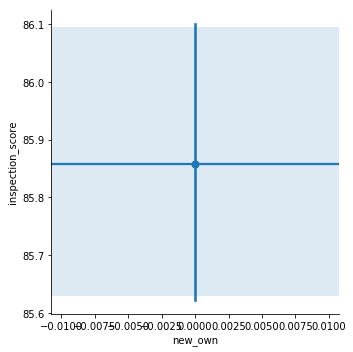

In [11]:
sns.lmplot(x="new_own", y="inspection_score", data=training, x_estimator=np.mean, order=1)

In [149]:
processed_data_df = raw_data_df
processed_data_df["routine_unsch"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Routine - Unscheduled', 'routine_unsch'] = 1
processed_data_df = processed_data_df.dropna()
score_lin_df = processed_data_df[[
                               'inspection_score', 
                               'routine_unsch'
                               ]].copy()
score_lin_df.head()
score_lin_df

,inspection_score,routine_unsch
2,84.0,1
14,86.0,1
34,83.0,1
38,90.0,1
39,94.0,1
40,94.0,1
41,96.0,1
47,90.0,1
48,92.0,1
78,96.0,1


In [150]:
data = score_lin_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

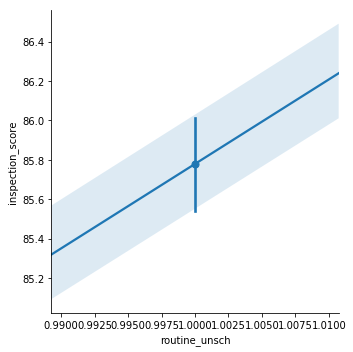

In [151]:
sns.lmplot(x="routine_unsch", y="inspection_score", data=training, x_estimator=np.mean, order=1)

In [152]:
processed_data_df = raw_data_df
processed_data_df["struct_inspect"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Structural Inspection', 'struct_inspect'] = 1
processed_data_df = processed_data_df.dropna()
score_lin_df = processed_data_df[[
                               'inspection_score', 
                               'struct_inspect'
                               ]].copy()
score_lin_df.head()
score_lin_df

,inspection_score,struct_inspect
2,84.0,0
14,86.0,0
34,83.0,0
38,90.0,0
39,94.0,0
40,94.0,0
41,96.0,0
47,90.0,0
48,92.0,0
78,96.0,0


In [153]:
data = score_lin_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

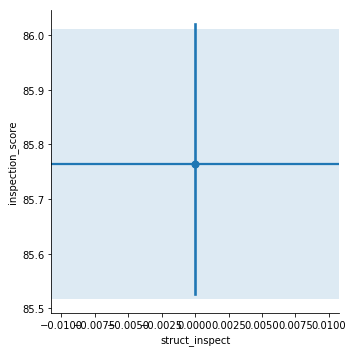

In [154]:
sns.lmplot(x="struct_inspect", y="inspection_score", data=training, x_estimator=np.mean, order=1)

In [155]:
processed_data_df = raw_data_df
processed_data_df["reinsp_follup"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Reinspection/Followup', 'reinsp_follup'] = 1
processed_data_df = processed_data_df.dropna()
score_lin_df = processed_data_df[[
                               'inspection_score', 
                               'reinsp_follup'
                               ]].copy()
score_lin_df.head()
score_lin_df

,inspection_score,reinsp_follup
2,84.0,0
14,86.0,0
34,83.0,0
38,90.0,0
39,94.0,0
40,94.0,0
41,96.0,0
47,90.0,0
48,92.0,0
78,96.0,0


In [156]:
data = score_lin_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

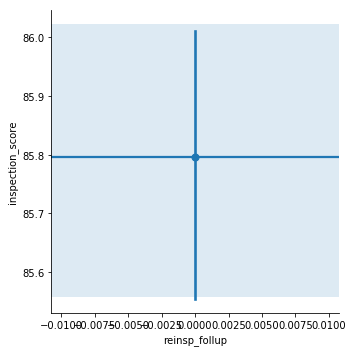

In [157]:
sns.lmplot(x="reinsp_follup", y="inspection_score", data=training, x_estimator=np.mean, order=1)

In [158]:
processed_data_df = raw_data_df
processed_data_df["new_construct"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'New Construction', 'new_construct'] = 1
processed_data_df = processed_data_df.dropna()
score_lin_df = processed_data_df[[
                               'inspection_score', 
                               'new_construct'
                               ]].copy()
score_lin_df.head()
score_lin_df

,inspection_score,new_construct
2,84.0,0
14,86.0,0
34,83.0,0
38,90.0,0
39,94.0,0
40,94.0,0
41,96.0,0
47,90.0,0
48,92.0,0
78,96.0,0


In [159]:
data = score_lin_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

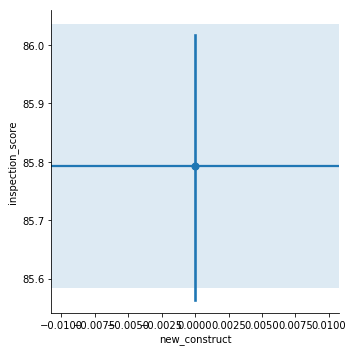

In [160]:
sns.lmplot(x="new_construct", y="inspection_score", data=training, x_estimator=np.mean, order=1)

In [161]:
processed_data_df = raw_data_df
processed_data_df["complaint"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Complaint', 'complaint'] = 1
processed_data_df = processed_data_df.dropna()
score_lin_df = processed_data_df[[
                               'inspection_score', 
                               'complaint'
                               ]].copy()
score_lin_df.head()
score_lin_df

,inspection_score,complaint
2,84.0,0
14,86.0,0
34,83.0,0
38,90.0,0
39,94.0,0
40,94.0,0
41,96.0,0
47,90.0,0
48,92.0,0
78,96.0,0


In [162]:
data = score_lin_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

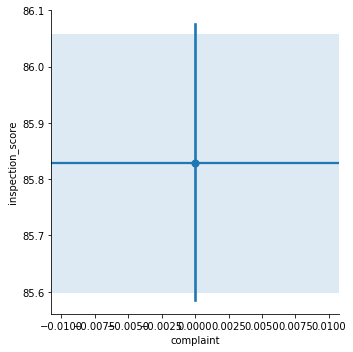

In [163]:
sns.lmplot(x="complaint", y="inspection_score", data=training, x_estimator=np.mean, order=1)

In [164]:
processed_data_df = raw_data_df
processed_data_df["non-inspect_visit"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Non-inspection site visit', 'non-inspect_visit'] = 1
processed_data_df = processed_data_df.dropna()
score_lin_df = processed_data_df[[
                               'inspection_score', 
                               'non-inspect_visit'
                               ]].copy()
score_lin_df.head()
score_lin_df

,inspection_score,non-inspect_visit
2,84.0,0
14,86.0,0
34,83.0,0
38,90.0,0
39,94.0,0
40,94.0,0
41,96.0,0
47,90.0,0
48,92.0,0
78,96.0,0


In [165]:
data = score_lin_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

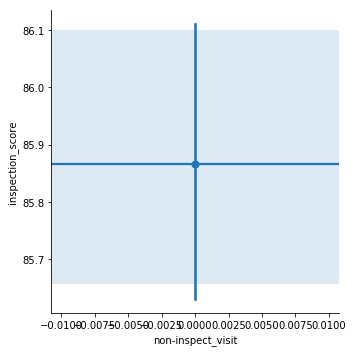

In [166]:
sns.lmplot(x="non-inspect_visit", y="inspection_score", data=training, x_estimator=np.mean, order=1)

In [167]:
processed_data_df = raw_data_df
processed_data_df["rout_sched"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Routine - Scheduled', 'rout_sched'] = 1
processed_data_df = processed_data_df.dropna()
score_lin_df = processed_data_df[[
                               'inspection_score', 
                               'rout_sched'
                               ]].copy()
score_lin_df.head()
score_lin_df

,inspection_score,rout_sched
2,84.0,0
14,86.0,0
34,83.0,0
38,90.0,0
39,94.0,0
40,94.0,0
41,96.0,0
47,90.0,0
48,92.0,0
78,96.0,0


In [168]:
data = score_lin_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

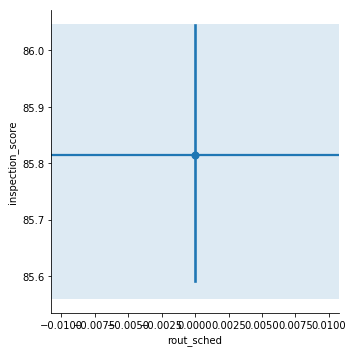

In [169]:
sns.lmplot(x="rout_sched", y="inspection_score", data=training, x_estimator=np.mean, order=1)

In [170]:
processed_data_df = raw_data_df
processed_data_df["food_ill"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Foodborne Illness Investigation', 'food_ill'] = 1
processed_data_df = processed_data_df.dropna()
score_lin_df = processed_data_df[[
                               'inspection_score', 
                               'food_ill'
                               ]].copy()
score_lin_df.head()
score_lin_df

,inspection_score,food_ill
2,84.0,0
14,86.0,0
34,83.0,0
38,90.0,0
39,94.0,0
40,94.0,0
41,96.0,0
47,90.0,0
48,92.0,0
78,96.0,0


In [171]:
data = score_lin_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

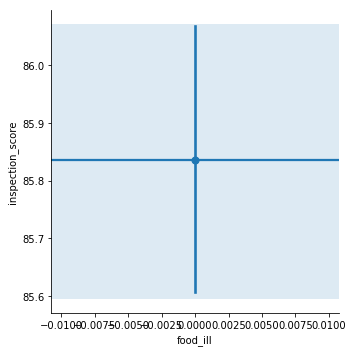

In [172]:
sns.lmplot(x="food_ill", y="inspection_score", data=training, x_estimator=np.mean, order=1)

In [173]:
processed_data_df = raw_data_df
processed_data_df["comp_follup"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Complaint Reinspection/Followup', 'comp_follup'] = 1
processed_data_df = processed_data_df.dropna()
score_lin_df = processed_data_df[[
                               'inspection_score', 
                               'comp_follup'
                               ]].copy()
score_lin_df.head()
score_lin_df

,inspection_score,comp_follup
2,84.0,0
14,86.0,0
34,83.0,0
38,90.0,0
39,94.0,0
40,94.0,0
41,96.0,0
47,90.0,0
48,92.0,0
78,96.0,0


In [174]:
data = score_lin_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

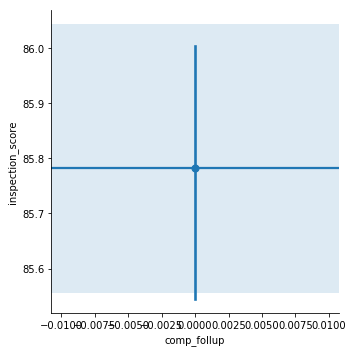

In [175]:
sns.lmplot(x="comp_follup", y="inspection_score", data=training, x_estimator=np.mean, order=1)

In [176]:
processed_data_df = raw_data_df
processed_data_df["spec_event"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Special Event', 'spec_event'] = 1
processed_data_df = processed_data_df.dropna()
score_lin_df = processed_data_df[[
                               'inspection_score', 
                               'spec_event'
                               ]].copy()
score_lin_df.head()
score_lin_df

,inspection_score,spec_event
2,84.0,0
14,86.0,0
34,83.0,0
38,90.0,0
39,94.0,0
40,94.0,0
41,96.0,0
47,90.0,0
48,92.0,0
78,96.0,0


In [177]:
data = score_lin_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

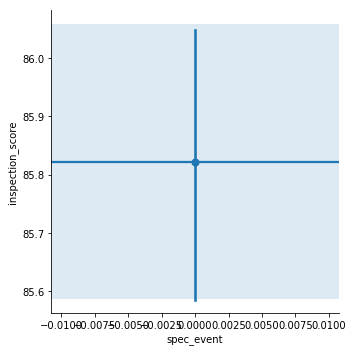

In [178]:
sns.lmplot(x="spec_event", y="inspection_score", data=training, x_estimator=np.mean, order=1)

In [179]:
processed_data_df = raw_data_df
processed_data_df["newown_follup"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'New Ownership - Followup', 'newown_follup'] = 1
processed_data_df = processed_data_df.dropna()
score_lin_df = processed_data_df[[
                               'inspection_score', 
                               'newown_follup'
                               ]].copy()
score_lin_df.head()
score_lin_df

,inspection_score,newown_follup
2,84.0,0
14,86.0,0
34,83.0,0
38,90.0,0
39,94.0,0
40,94.0,0
41,96.0,0
47,90.0,0
48,92.0,0
78,96.0,0


In [180]:
data = score_lin_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

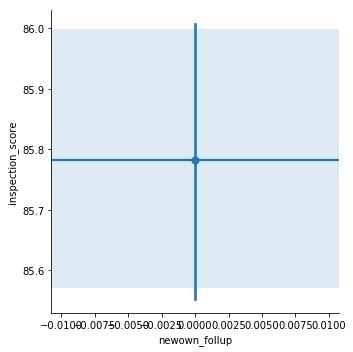

In [181]:
sns.lmplot(x="newown_follup", y="inspection_score", data=training, x_estimator=np.mean, order=1)

In [182]:
processed_data_df = raw_data_df
processed_data_df["comm_health"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Community Health Assessment', 'comm_health'] = 1
processed_data_df = processed_data_df.dropna()
score_lin_df = processed_data_df[[
                               'inspection_score', 
                               'comm_health'
                               ]].copy()
score_lin_df.head()
score_lin_df

,inspection_score,comm_health
2,84.0,0
14,86.0,0
34,83.0,0
38,90.0,0
39,94.0,0
40,94.0,0
41,96.0,0
47,90.0,0
48,92.0,0
78,96.0,0


In [183]:
data = score_lin_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

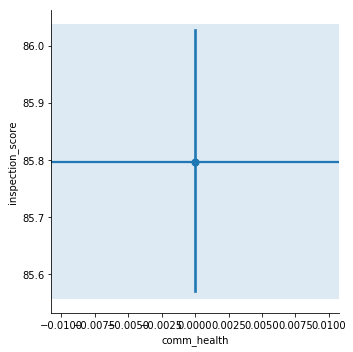

In [184]:
sns.lmplot(x="comm_health", y="inspection_score", data=training, x_estimator=np.mean, order=1)

In [185]:
processed_data_df = raw_data_df
processed_data_df["admin_docrev"] = 0
processed_data_df.loc[processed_data_df['inspection_type'] == 'Administrative or Document Review', 'admin_docrev'] = 1
processed_data_df = processed_data_df.dropna()
score_lin_df = processed_data_df[[
                               'inspection_score', 
                               'admin_docrev'
                               ]].copy()
score_lin_df.head()
score_lin_df

,inspection_score,admin_docrev
2,84.0,0
14,86.0,0
34,83.0,0
38,90.0,0
39,94.0,0
40,94.0,0
41,96.0,0
47,90.0,0
48,92.0,0
78,96.0,0


In [186]:
data = score_lin_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

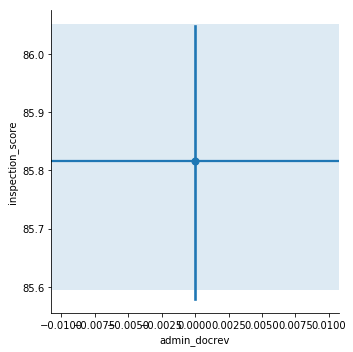

In [187]:
sns.lmplot(x="admin_docrev", y="inspection_score", data=training, x_estimator=np.mean, order=1)

In [188]:
model = ols("inspection_score ~ new_own + routine_unsch + struct_inspect + reinsp_follup + new_construct + complaint + non-inspect_visit + rout_sched + food_ill + comp_follup + spec_event + newown_follup + comm_health + admin_docrev", training).fit()
#model = ols("happy ~ age + income + np.power(age, 2) + np.power(income, 2)", training).fit()
model.summary()

PatsyError: Error evaluating factor: NameError: name 'food_ill' is not defined
    inspection_score ~ new_own + routine_unsch + struct_inspect + reinsp_follup + new_construct + complaint + non-inspect_visit + rout_sched + food_ill + comp_follup + spec_event + newown_follup + comm_health + admin_docrev
                                                                                                                                               ^^^^^^^^

In [142]:
# Rerun with SciKitLearn because it's easy to check accuracy
features_train = training.drop("inspection_score", axis=1).as_matrix(columns=None)
labels_train = training["inspection_score"].as_matrix(columns=None)

features_test = holdout.drop("inspection_score", axis=1).as_matrix(columns=None)
labels_test = holdout["inspection_score"].as_matrix(columns=None)

lm = linear_model.LinearRegression()
clf = lm.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = metrics.r2_score(labels_test, pred)
print("R squared:",lm.score(features_train,labels_train))
print("Accuracy:",accuracy)

R squared: 0.0
Accuracy: -0.000440829481494
